In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [49]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)

from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario, SequentialEvaluator)

from ema_workbench.em_framework.evaluators import perform_experiments, optimize
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.analysis import prim, dimensional_stacking, cart
from ema_workbench.util import ema_logging, utilities

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [4]:
from visualization_functions import histogram_maker, mean_outcomes, aggregate_outcomes, scatter_maker, pairplot_maker, boxplot_histogram_maker

# Data visualization on the base case

The results are loaded in from a previous experiment run, it includes 1000 scenarios sampled with LHS.

In [5]:
results = utilities.load_results('outcomes/1000ScenariosBaseCase.csv')

experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)
experiments = pd.DataFrame(experiments)
results = experiments.join(outcomes)
results = results.drop(columns="model")
# results = results.apply(pd.to_numeric)
results.head()

[MainProcess/INFO] results loaded succesfully from C:\Users\newbi\project-local\Model-based-decision-making\outcomes\1000ScenariosBaseCase.csv


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,64.0,341.707998,10.0,0.008967,329.059434,1.0,0.671443,46.836038,1.0,0.541864,...,0,0.000000,0.0,0,0.0,0.0,0,0.0,0.0,0.0
1,49.0,270.516534,1.0,0.389864,64.116779,1.0,0.458602,211.600292,1.5,0.030226,...,0,1.053592,0.0,0,0.0,0.0,0,0.0,0.0,0.0
2,109.0,217.092157,1.0,0.720433,119.844801,1.5,0.445405,332.843340,10.0,0.123183,...,0,1.091069,0.0,0,0.0,0.0,0,0.0,0.0,0.0
3,106.0,314.195207,1.0,0.000931,149.934556,10.0,0.203409,177.126583,1.5,0.900999,...,0,0.000000,0.0,0,0.0,0.0,0,0.0,0.0,0.0
4,123.0,331.097660,1.5,0.138750,275.055604,1.0,0.296295,172.209395,1.5,0.888339,...,0,0.000000,0.0,0,0.0,0.0,0,0.0,0.0,0.0


A distribution of the outcomes over location and timesteps are given. These histograms only showcase the expected annual damages and the expected number of deaths, the costs outcomes are not interesting as they are all 0 in the base case. 

Plot Expected Annual Damage(Histogram)
This is timestep 0


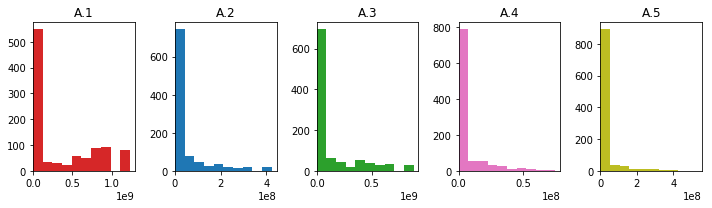

This is timestep 1


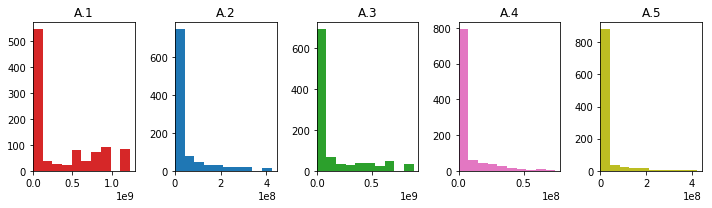

This is timestep 2


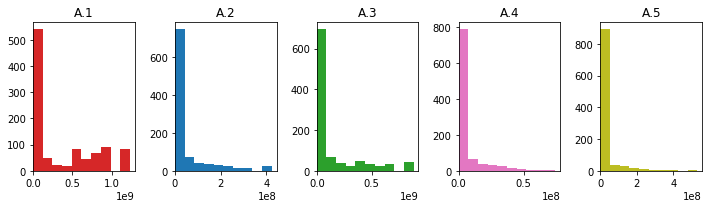

Plot Expected Number of Deaths(Histogram)
This is timestep 0


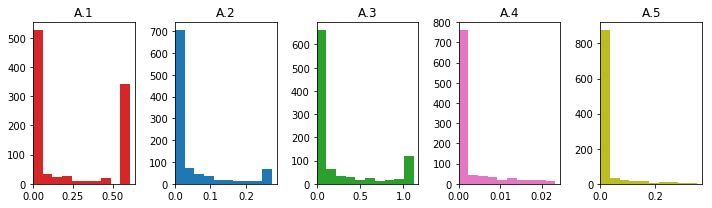

This is timestep 1


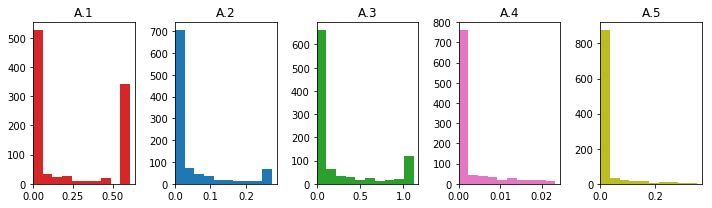

This is timestep 2


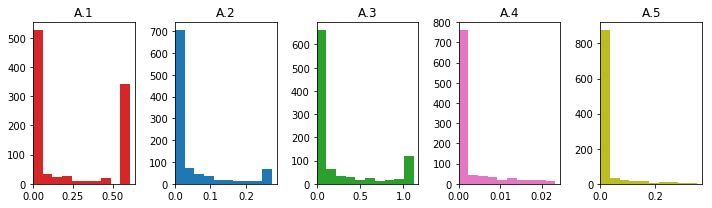

In [6]:
histogram_maker(results, "Expected Annual Damage")
histogram_maker(results, "Expected Number of Deaths")

To visualize which location is the most impacted by floods in the basecase, 

No handles with labels found to put in legend.


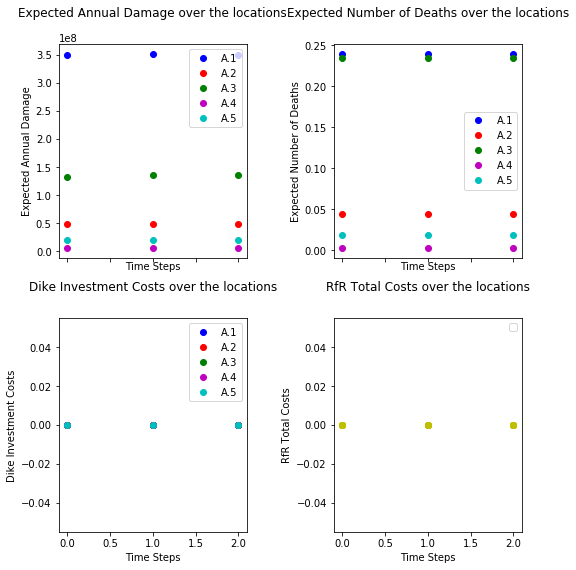

In [7]:
mean_outcomes(results)

Plot Expected Annual Damage(Scatterplot)
This is timestep 0


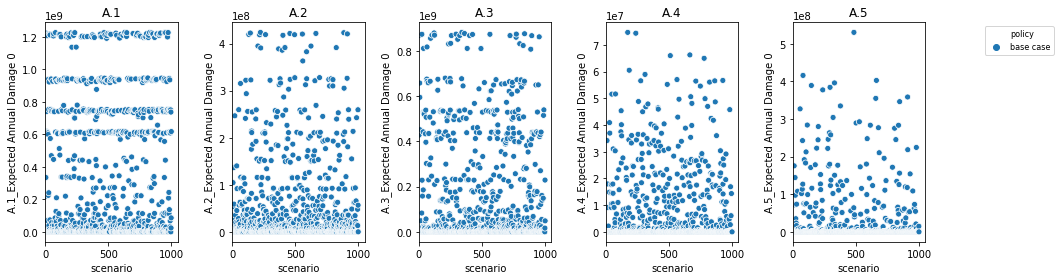

This is timestep 1


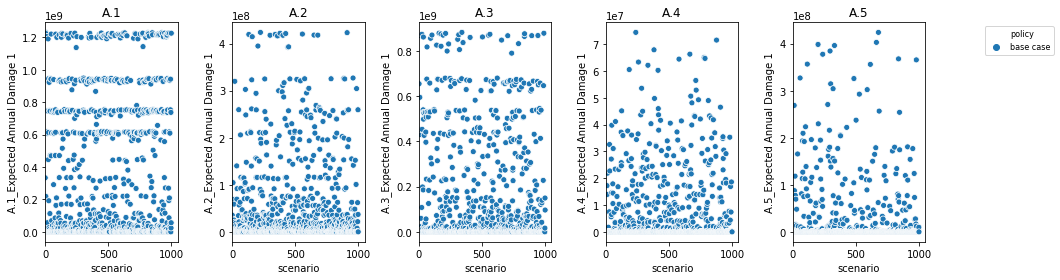

This is timestep 2


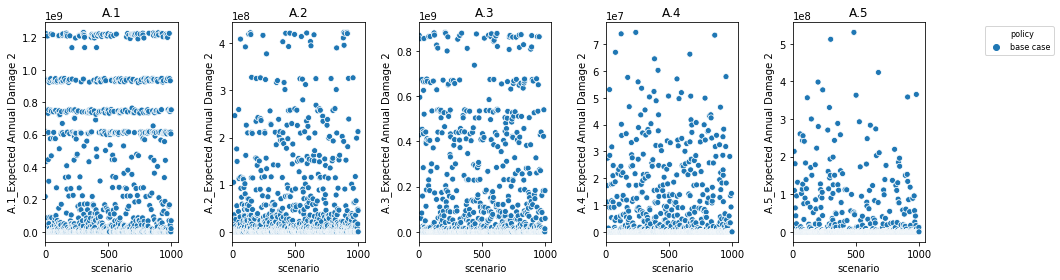

Plot Expected Number of Deaths(Scatterplot)
This is timestep 0


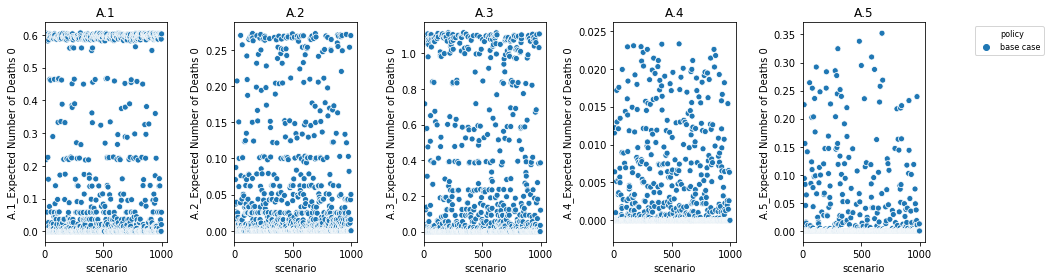

This is timestep 1


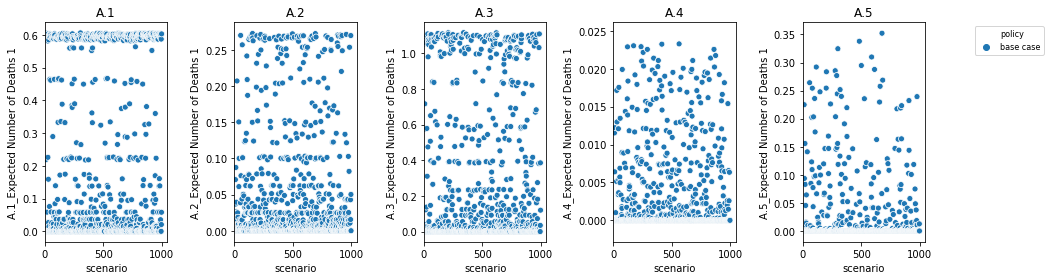

This is timestep 2


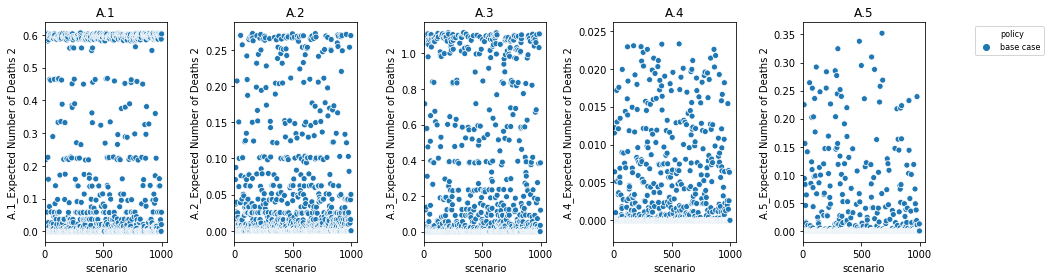

In [8]:
scatter_maker(results, "Expected Annual Damage")
scatter_maker(results, "Expected Number of Deaths")

C:\Users\newbi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\newbi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


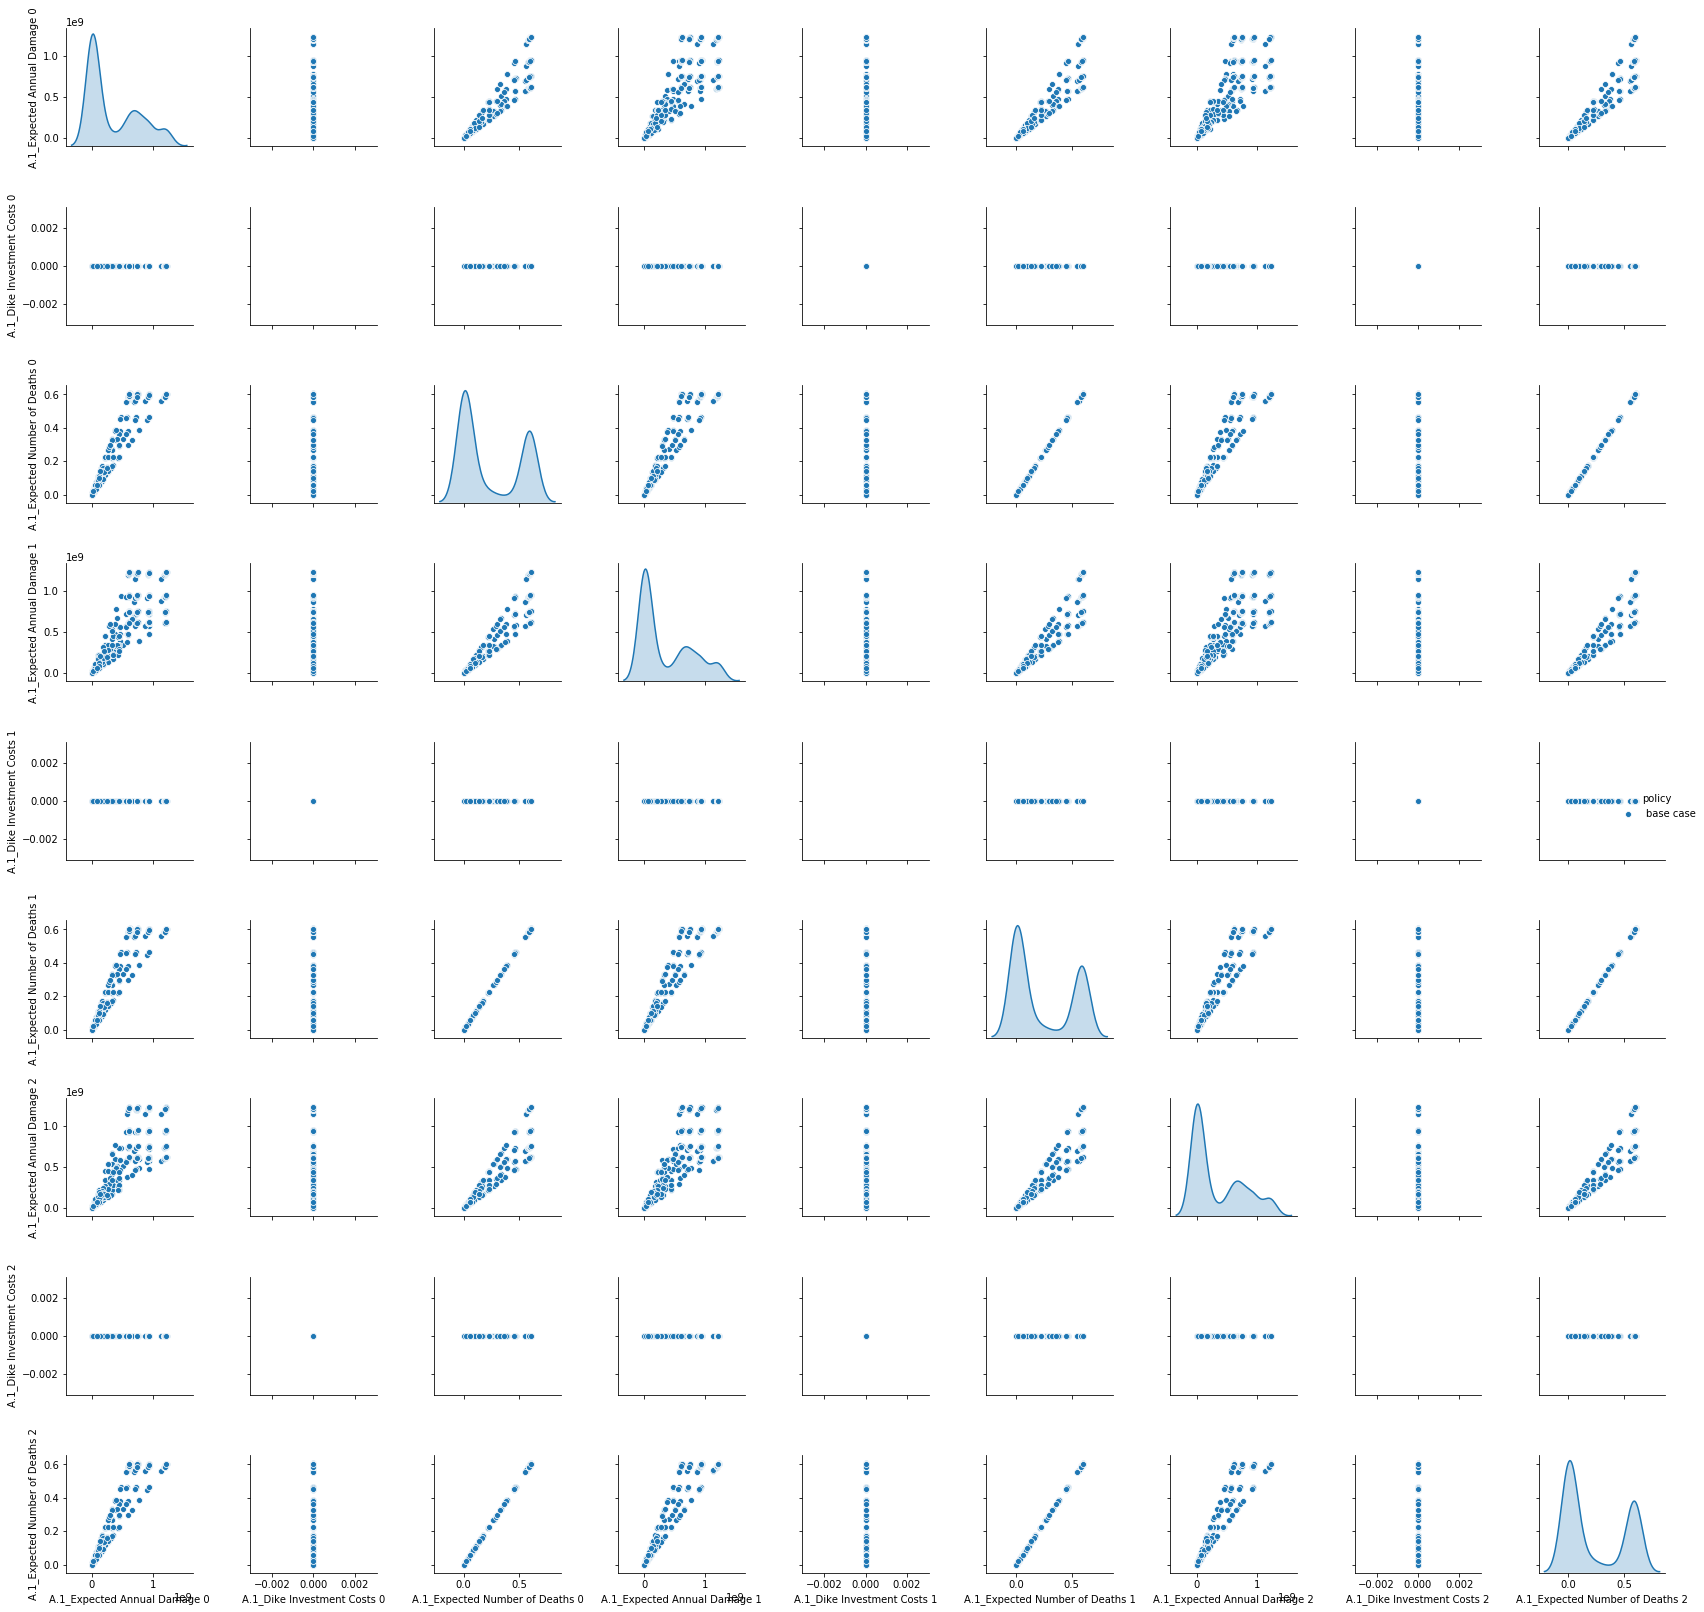

In [9]:
pairplot_maker(results, "A.1")
# pairplot_maker(results, "A.2")
# pairplot_maker(results, "A.3")
# pairplot_maker(results, "A.4")
# pairplot_maker(results, "A.5")

# Scenario Discovery

Total Expected Number of Deaths First quantile: 0.614663518226044
Total Expected Number of Deaths Mean: 1.61575355331798
Total Expected Annual Damage First quantile: 583888960.7998052
Total Expected Annual Damage Mean: 1678899372.4850564


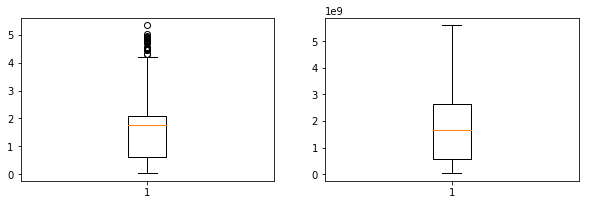

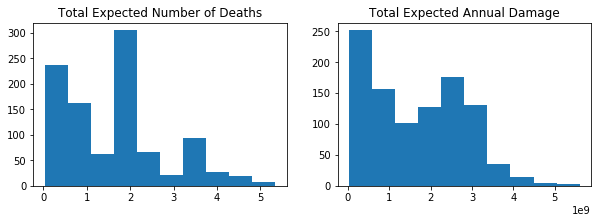

In [11]:
boxplot_histogram_maker(results)

## Scenario Discovery on Deaths

In [55]:
x = results.iloc[:, :19] # Only take the uncertentainties 

y_deaths = results['Total Expected Number of Deaths'].values
y_deaths = y_deaths > np.percentile(y_deaths, 85)

[MainProcess/INFO] 1000 points remaining, containing 150 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.094, coverage: 0.6266666666666667, density: 1.0 restricted_dimensions: 3


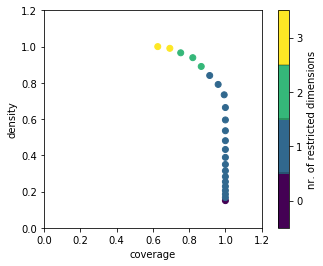

In [40]:
prim_alg = prim.Prim(x, y_deaths, threshold=0.65, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage    0.626667
density            1
id                22
mass           0.094
mean               1
res_dim            3
Name: 22, dtype: object

             box 22                                          
                min       max                       qp values
A.3_pfail  0.000048  0.144188   [-1.0, 4.840687032040365e-69]
A.1_pfail  0.345671  0.999122  [2.1161879348389605e-06, -1.0]
A.2_pfail  0.081178  0.999189     [0.06728957532293703, -1.0]



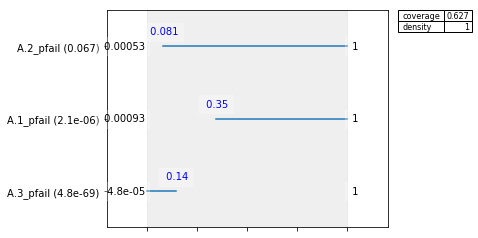

In [41]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

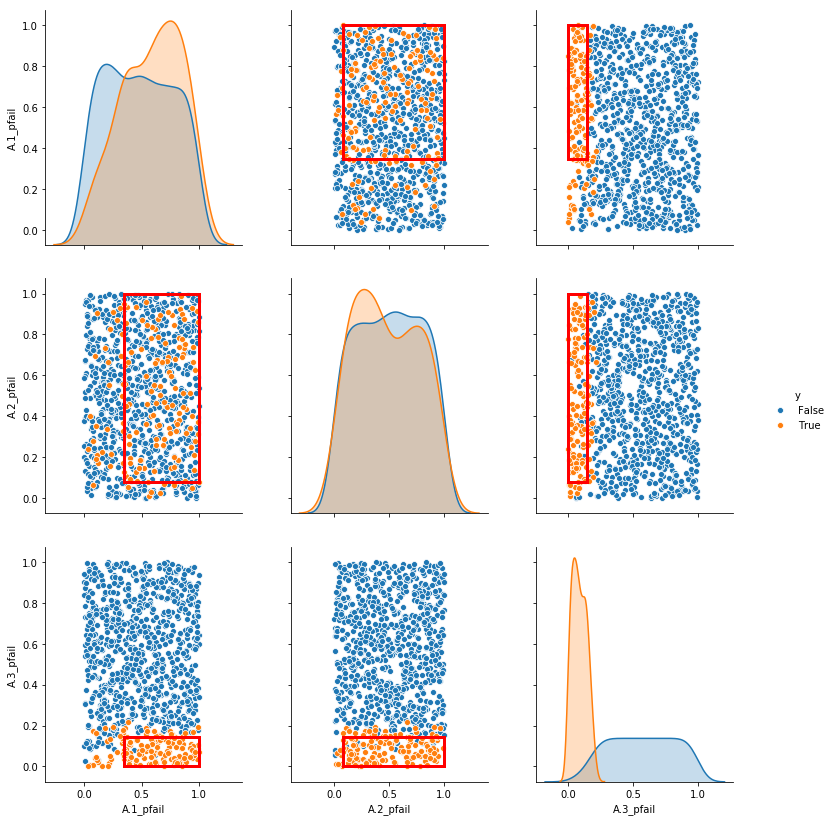

In [42]:
box1.select(-1)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

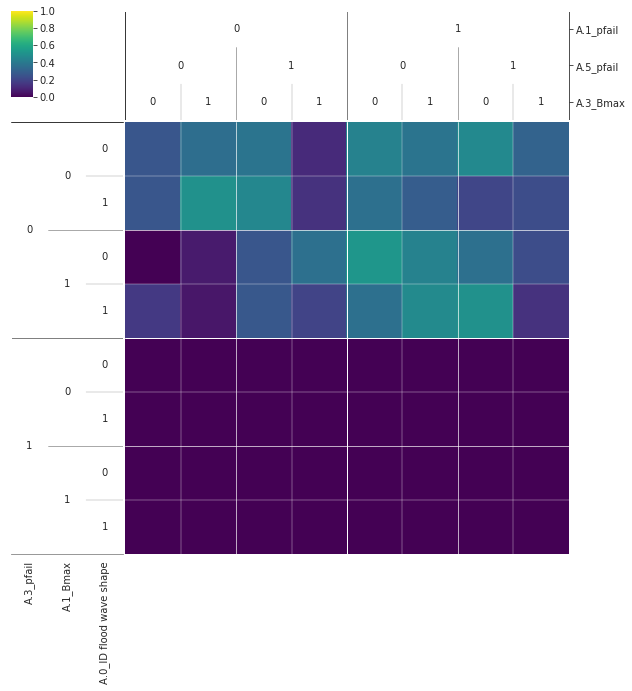

In [48]:
dimensional_stacking.create_pivot_plot(x, y_deaths, 3, nbins = 2)
plt.show()

In [79]:
cart_alg = cart.CART(x, y_deaths, 0.05)
cart_alg.build_tree()

print(cart_alg.stats_to_dataframe())
print(cart_alg.boxes_to_dataframe())

# cart_alg.show_tree()
# fig = plt.gcf()
# fig.figure(figsize = 12, 12)
# plt.show()

       coverage   density   mass  res dim
box 1  0.173333  0.520000  0.050        2
box 2  0.406667  0.968254  0.063        2
box 3  0.373333  0.888889  0.063        2
box 4  0.046667  0.140000  0.050        1
box 5  0.000000  0.000000  0.774        1
                 box 1                  box 2                 box 3            \
                   min       max          min        max        min       max   
A.3_pfail  4.78221e-05  0.175958  4.78221e-05  0.0811844  0.0811844  0.175958   
A.1_pfail  0.000930847  0.345671     0.345671   0.999122   0.345671  0.999122   

                 box 4                  box 5            
                   min       max          min       max  
A.3_pfail     0.175958  0.226432     0.226432  0.999879  
A.1_pfail  0.000930847  0.999122  0.000930847  0.999122  


## Scenario Discovery on Damages

In [56]:
y_damages = results['Total Expected Annual Damage'].values
y_damages = y_damages > np.percentile(y_damages, 90)

[MainProcess/INFO] 1000 points remaining, containing 100 cases of interest
[MainProcess/INFO] mean: 0.5555555555555556, mass: 0.099, coverage: 0.55, density: 0.5555555555555556 restricted_dimensions: 5


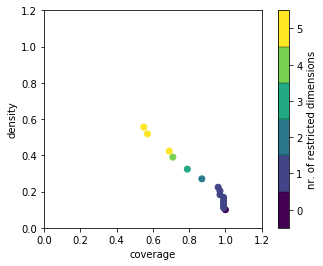

In [58]:
prim_alg = prim.Prim(x, y_damages, threshold=0.50, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage        0.55
density     0.555556
id                14
mass           0.099
mean        0.555556
res_dim            5
Name: 14, dtype: object

                          box 14                   \
                             min              max   
A.1_pfail            0.000930847         0.390932   
A.1_Bmax                 30.0525          306.718   
discount rate 0       {1.5, 2.5}       {1.5, 2.5}   
discount rate 2  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}   
discount rate 1  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}   

                                                 
                                      qp values  
A.1_pfail         [-1.0, 2.964769179127261e-12]  
A.1_Bmax             [-1.0, 0.2948623204315433]  
discount rate 0  [0.00041716064300372933, -1.0]  
discount rate 2     [0.03352579193830987, -1.0]  
discount rate 1     [0.04338951713545395, -1.0]  



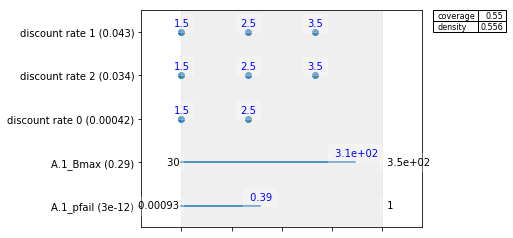

In [59]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

discount rate 0 [1.5, 2.5, 3.5, 4.5]
discount rate 1 [1.5, 2.5, 3.5, 4.5]
discount rate 2 [1.5, 2.5, 3.5, 4.5]


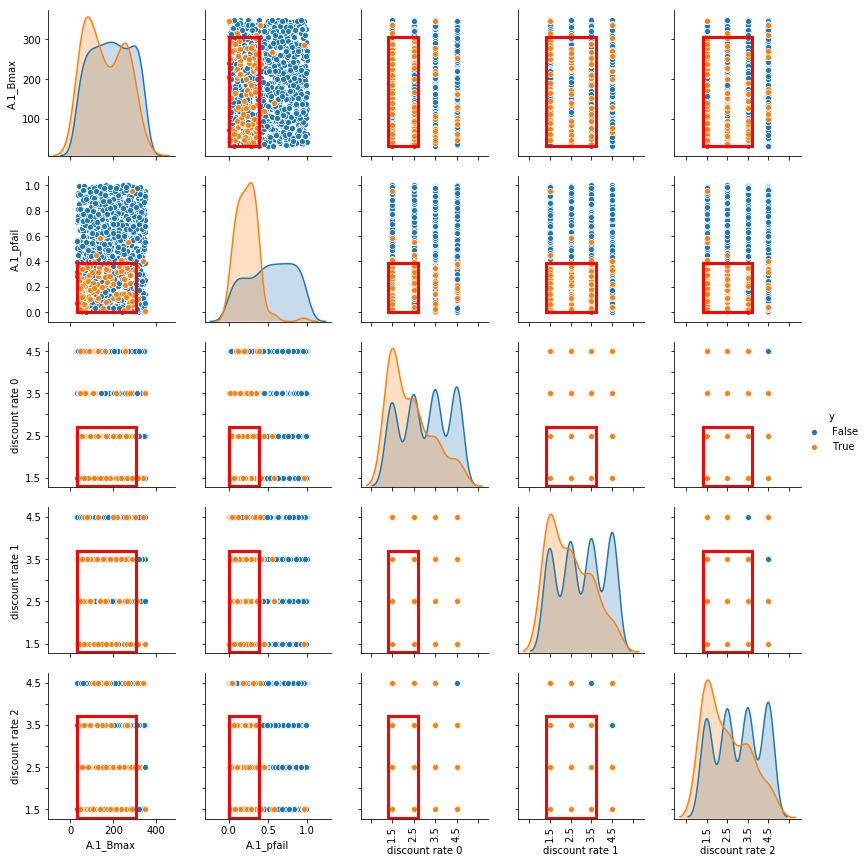

In [60]:
box1.select(-1)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

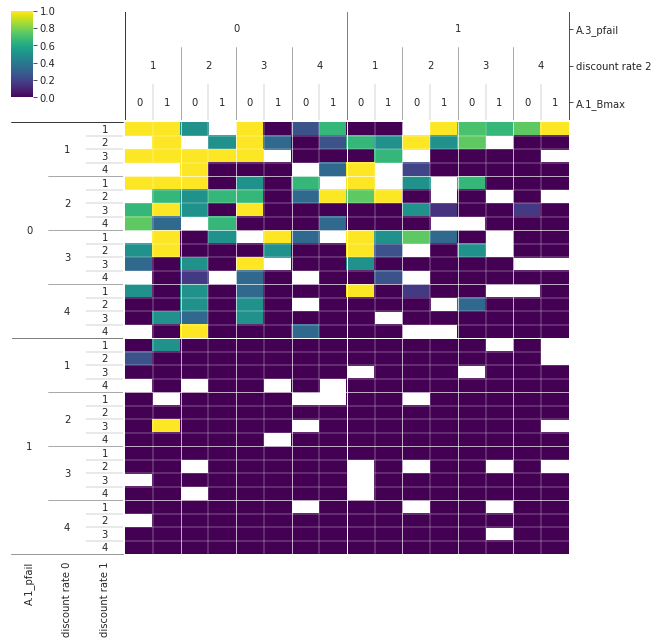

In [54]:
dimensional_stacking.create_pivot_plot(x, y_damages, 3, nbins = 2)
plt.show()

In [80]:
cart_alg = cart.CART(x, y_damages, 0.05)
cart_alg.build_tree()

print(cart_alg.stats_to_dataframe())
print(cart_alg.boxes_to_dataframe())

cart_alg.show_tree()
fig = plt.gcf()
fig.figure(figsize = 12, 12)
plt.show()

ValueError: operands could not be broadcast together with shapes (13,) (1000,11) 

In [67]:
for row in results:
    print(index)

TypeError: 'numpy.int32' object is not iterable